In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#!pip install -U scikit-learn
#!pip install pandas
#!pip install seaborn
#!pip install matplotlib

In [3]:
import sklearn
print(sklearn.__version__)

1.5.2


In [4]:
predictive_data = pd.read_csv('balanced_training_data simple.csv')

In [5]:
predictive_data.head(10)

,Vibration_01,Vibration_02,Vibration_03,Temperature_01,RPM_Sensor_01,Failure Type,Target
0,4.094888,4.670561,2.532947,45.150067,446.499021,Trimmer Bearing Fault,1
1,4.117969,5.720775,3.819290,44.147673,428.611402,No Failure,0
2,4.585270,2.000000,2.000000,35.402643,413.518446,Trimmer Bearing Fault,1
3,2.095915,4.891233,2.000000,33.922705,443.070653,Trimmer Bearing Fault,1
4,5.400928,2.000000,3.813890,27.743912,381.288718,Trimmer Bearing Fault,1
5,4.747218,7.554748,3.153024,28.025732,409.426859,No Failure,0
6,4.513870,5.523327,3.833563,46.033264,367.757741,No Failure,0
7,2.329596,4.511456,4.128967,29.652122,370.477599,No Failure,0
8,3.018782,3.520357,6.727135,48.336879,423.297998,No Failure,0
9,4.001745,4.711114,6.557736,44.071057,367.179755,No Failure,0


In [6]:
predictive_data.shape

(19938, 7)

In [7]:
predictive_data.describe()

,Vibration_01,Vibration_02,Vibration_03,Temperature_01,RPM_Sensor_01,Target
count,19938.000000,19938.000000,19938.000000,19938.000000,19938.000000,19938.000000
mean,4.832509,4.812555,4.840388,38.561204,396.619173,0.195305
std,1.748903,1.749039,1.744028,6.582207,31.509978,0.396446
min,2.000000,2.000000,2.000000,27.002015,294.887034,0.000000
25%,3.315897,3.291093,3.315712,32.904263,371.148385,0.000000
50%,4.764117,4.762785,4.786555,38.607638,397.416056,0.000000
75%,6.326183,6.289310,6.312240,44.279256,423.163741,0.000000
max,7.999896,7.999738,7.999103,49.998447,449.999385,1.000000


In [8]:
predictive_data.dtypes

Vibration_01      float64
Vibration_02      float64
Vibration_03      float64
Temperature_01    float64
RPM_Sensor_01     float64
Failure Type       object
Target              int64
dtype: object

In [9]:
predictive_data.shape

(19938, 7)

In [10]:
predictive_data.head(50)

,Vibration_01,Vibration_02,Vibration_03,Temperature_01,RPM_Sensor_01,Failure Type,Target
0,4.094888,4.670561,2.532947,45.150067,446.499021,Trimmer Bearing Fault,1
1,4.117969,5.720775,3.819290,44.147673,428.611402,No Failure,0
2,4.585270,2.000000,2.000000,35.402643,413.518446,Trimmer Bearing Fault,1
3,2.095915,4.891233,2.000000,33.922705,443.070653,Trimmer Bearing Fault,1
4,5.400928,2.000000,3.813890,27.743912,381.288718,Trimmer Bearing Fault,1
5,4.747218,7.554748,3.153024,28.025732,409.426859,No Failure,0
6,4.513870,5.523327,3.833563,46.033264,367.757741,No Failure,0
7,2.329596,4.511456,4.128967,29.652122,370.477599,No Failure,0
8,3.018782,3.520357,6.727135,48.336879,423.297998,No Failure,0
9,4.001745,4.711114,6.557736,44.071057,367.179755,No Failure,0


In [11]:
missing = {}
for i in range(0 , len(predictive_data.isnull().sum().index)):
    if predictive_data.isnull().sum()[i] != 0:
        missing[predictive_data.isnull().sum().index[i]] = predictive_data.isnull().sum()[i]
missing_data = pd.Series(missing).to_frame()
missing_data = missing_data.rename(columns={0:"missing values"})
        
missing_data  

C:\Users\isuri\AppData\Local\Temp\ipykernel_19532\208776681.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if predictive_data.isnull().sum()[i] != 0:


,missing values


In [12]:
numerical_cols = predictive_data.select_dtypes(include=['float64']).columns.tolist()
numerical_cols

['Vibration_01',
 'Vibration_02',
 'Vibration_03',
 'Temperature_01',
 'RPM_Sensor_01']

In [13]:
# for col in numerical_cols:
#     sns.set(style="darkgrid")
#     plt.figure(figsize = (15,10))
#     ax = sns.boxplot(y=col, data=predictive_data)
#     ax = sns.swarmplot(y=col, data=predictive_data, color="red")
#     plt.show()

In [14]:
def handle_outliers(df, method='remove', factor=1.5):
    df_out = df.copy()
    numeric_cols = df.select_dtypes(include=['number']).columns
    
    for col in numeric_cols:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        
        if method == 'remove':
            df_out = df_out[(df_out[col] >= lower_bound) & (df_out[col] <= upper_bound)]
        elif method == 'cap':
            df_out[col] = df_out[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    
    return df_out

In [15]:
# predictive_data_cleaned = handle_outliers(predictive_data, 'remove', 1.5)

In [16]:
predictive_data.shape

(19938, 7)

In [17]:
failure_type_mapping = predictive_data[['Target', 'Failure Type']].drop_duplicates().set_index('Target')

In [18]:
X = predictive_data.drop(['Target','Failure Type'] , axis=1)
y = predictive_data['Target']

In [19]:
y

0        1
1        0
2        1
3        1
4        1
        ..
19933    1
19934    1
19935    1
19936    1
19937    1
Name: Target, Length: 19938, dtype: int64

In [20]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
X_scaled = scale.fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X_scaled , y , test_size=.3 , random_state=0 )

In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=50 , criterion='entropy')
model.fit(X_train , y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [23]:
model.score(X_test , y_test)

0.8916750250752257

In [24]:
#model.predict([[4.859658817, 2.857479367, 2.98233026, 40.53738173, 371.9483566]])
# Single prediction
predicted_target = model.predict([[4.094888, 4.670561, 2.532947, 45.150067, 446.499021]])
predicted_failure_type = failure_type_mapping.loc[predicted_target[0]].values[0]
print(f"Predicted Target: {predicted_target[0]}")
print(f"Predicted Failure Type: {predicted_failure_type}")

Predicted Target: 0
Predicted Failure Type: No Failure


In [25]:
#y_pred = model.predict(X_test)
#y_pred
# Predictions on test data
y_pred = model.predict(X_test)
failure_types_pred = [failure_type_mapping.loc[target].values[0] for target in y_pred]
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [26]:
X_test

array([[0.09742382, 0.        , 0.        , 0.09610636, 0.60235195],
       [0.49362038, 0.32711202, 0.68209382, 0.83167447, 0.55621278],
       [0.26738896, 0.00290178, 0.62956548, 0.09972137, 0.53800562],
       ...,
       [0.51375162, 0.86669645, 0.08621375, 0.01684813, 0.39066095],
       [0.8435024 , 0.40621258, 0.91725077, 0.77938899, 0.40055318],
       [0.25316543, 0.60835453, 0.41713589, 0.23892367, 0.6263831 ]])

In [27]:
# Combine predictions
predictions_df = pd.DataFrame({
    'Predicted Target': y_pred,
    'Predicted Failure Type': failure_types_pred
})
print(predictions_df.head())

   Predicted Target   Predicted Failure Type
0                 1  [Trimmer Bearing Fault]
1                 0               No Failure
2                 0               No Failure
3                 0               No Failure
4                 0               No Failure


In [28]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [29]:
cm = confusion_matrix(y_test , y_pred)
cm

array([[4786,   41],
       [ 607,  548]])

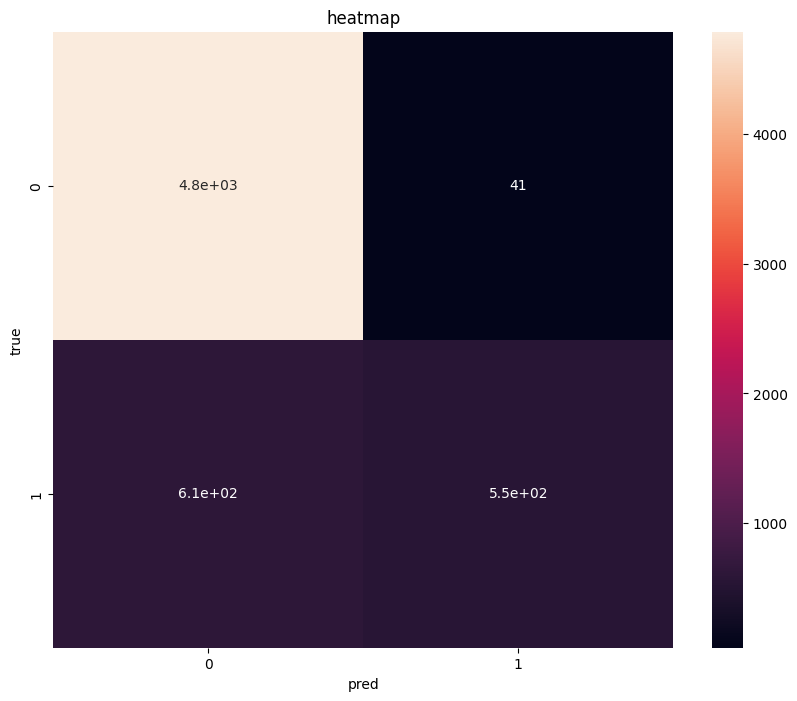

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(cm , annot=True)
plt.xlabel("pred" )
plt.ylabel("true")
plt.title("heatmap")
plt.show()

In [31]:
classification_report(y_test , y_pred)

'              precision    recall  f1-score   support\n\n           0       0.89      0.99      0.94      4827\n           1       0.93      0.47      0.63      1155\n\n    accuracy                           0.89      5982\n   macro avg       0.91      0.73      0.78      5982\nweighted avg       0.90      0.89      0.88      5982\n'

In [32]:
import pickle

# Save model
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
    
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scale, file)

# Save the failure type mapping
with open('failure_type_mapping.pkl', 'wb') as file:
    pickle.dump(failure_type_mapping, file)

# # Load model
# with open('model.pkl', 'rb') as file:
#     loaded_model = pickle.load(file)


In [33]:
scale

MinMaxScaler()